In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
"""
Desired Features:

[] Hooks to look at percentages of zero activations
[] Incorporate tabular data (can create an nn.Module that concatenates the two)
[] Add strategic cropping (to make them square)
[] Remove all other transforms!!
[] More sophisticated dataframe filtering
[] Add a test set from other users (not trained on any of their pictures)
[] Learn how to mix models without removing the weights from transfer learning





"""

In [ ]:
"""class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.cnn = models.inception_v3(pretrained=False, aux_logits=False)
        self.cnn.fc = nn.Linear(
            self.cnn.fc.in_features, 20)
        
        self.fc1 = nn.Linear(20 + 10, 60)
        self.fc2 = nn.Linear(60, 5)
        
    def forward(self, image, data):
        x1 = self.cnn(image)
        x2 = data
        
        x = torch.cat((x1, x2), dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

model = MyModel()

batch_size = 2
image = torch.randn(batch_size, 3, 299, 299)
data = torch.randn(batch_size, 10)

output = model(image, data)"""

In [2]:
from fastai.vision import *
import numpy as np
import pandas as pd

In [3]:
data_path = Path('Output')

In [65]:
# data = (ImageList.from_csv(path = r"C:\Users\William\OneDrive\Code", csv_name = r'output_csv.csv', cols = 'filenames', suffix = '.jpg')
#         #.filter_by_func(lambda x: print(x))
#         .split_by_rand_pct()
#         .label_from_df(cols = 'Engagement (Avg Likes)')
#        )

C:\Users\William\OneDrive\Code\Output\B6tnR2wBjzS.jpg
C:\Users\William\OneDrive\Code\Output\B7UDiEjhA05.jpg
C:\Users\William\OneDrive\Code\Output\B5yBx6EpREX.jpg
C:\Users\William\OneDrive\Code\Output\B65yoQBFrdv.jpg
C:\Users\William\OneDrive\Code\Output\B6vhH1glPzb.jpg
C:\Users\William\OneDrive\Code\Output\B7L3viQFGa2.jpg
C:\Users\William\OneDrive\Code\Output\B6ker2uFXzm.jpg
C:\Users\William\OneDrive\Code\Output\B6dv2OylAxO.jpg
C:\Users\William\OneDrive\Code\Output\B50CZqOFP0w.jpg
C:\Users\William\OneDrive\Code\Output\B5BWyrTlS26.jpg
C:\Users\William\OneDrive\Code\Output\B6beHlNhA2_.jpg
C:\Users\William\OneDrive\Code\Output\B7OgIQmBIKv.jpg
C:\Users\William\OneDrive\Code\Output\B6bddAGhCZC.jpg
C:\Users\William\OneDrive\Code\Output\B6rE9uUh7fr.jpg
C:\Users\William\OneDrive\Code\Output\B61K-sthEP6.jpg
C:\Users\William\OneDrive\Code\Output\B6_nvVth3e6.jpg
C:\Users\William\OneDrive\Code\Output\B7TKTiVB_xS.jpg
C:\Users\William\OneDrive\Code\Output\B7HLlLXBN0N.jpg
C:\Users\William\OneDrive\Co

C:\Users\William\OneDrive\Code\Output\B7G6BvInwdG.jpg
C:\Users\William\OneDrive\Code\Output\B01F6E_nBN-.jpg
C:\Users\William\OneDrive\Code\Output\B5TKKkIH6Xw.jpg
C:\Users\William\OneDrive\Code\Output\BzTCE27Hgzg.jpg
C:\Users\William\OneDrive\Code\Output\B6gmBTpnjNw.jpg
C:\Users\William\OneDrive\Code\Output\B5qVHngHrsl.jpg
C:\Users\William\OneDrive\Code\Output\B7Be9OcnE8a.jpg
C:\Users\William\OneDrive\Code\Output\B7R97efHcVs.jpg
C:\Users\William\OneDrive\Code\Output\B6JREuMnbyL.jpg
C:\Users\William\OneDrive\Code\Output\B7Twpl3HsbM.jpg
C:\Users\William\OneDrive\Code\Output\B6YrsMmHGIW.jpg
C:\Users\William\OneDrive\Code\Output\B1ErcMfHTpp.jpg
C:\Users\William\OneDrive\Code\Output\B7WtVBvngFa.jpg
C:\Users\William\OneDrive\Code\Output\B5oBFcNH4-B.jpg
C:\Users\William\OneDrive\Code\Output\B29hZConeQg.jpg
C:\Users\William\OneDrive\Code\Output\B3pubpSnY4j.jpg
C:\Users\William\OneDrive\Code\Output\B0CXC43H8wo.jpg
C:\Users\William\OneDrive\Code\Output\B5_Kay1ADqr.jpg
C:\Users\William\OneDrive\Co

C:\Users\William\OneDrive\Code\Output\B3KU-DJnfx2.jpg
C:\Users\William\OneDrive\Code\Output\B31lzf3IaGg.jpg
C:\Users\William\OneDrive\Code\Output\B4xkqZUImYR.jpg
C:\Users\William\OneDrive\Code\Output\B165blLFWuy.jpg
C:\Users\William\OneDrive\Code\Output\B0okeXalj7B.jpg
C:\Users\William\OneDrive\Code\Output\B35JvG-FBGd.jpg
C:\Users\William\OneDrive\Code\Output\B68p7kkFAa2.jpg
C:\Users\William\OneDrive\Code\Output\B1W31VZFkPh.jpg
C:\Users\William\OneDrive\Code\Output\B6YVw3vFDXM.jpg
C:\Users\William\OneDrive\Code\Output\B3kfJEKFyne.jpg
C:\Users\William\OneDrive\Code\Output\B1J8fKZlp0u.jpg
C:\Users\William\OneDrive\Code\Output\B1E0drZlm5H.jpg
C:\Users\William\OneDrive\Code\Output\B1UOzI7lbpT.jpg
C:\Users\William\OneDrive\Code\Output\B1jwUPVl91d.jpg
C:\Users\William\OneDrive\Code\Output\B1MfO3Xldey.jpg
C:\Users\William\OneDrive\Code\Output\B06k-1slS0R.jpg
C:\Users\William\OneDrive\Code\Output\B5QkqXrlb5u.jpg
C:\Users\William\OneDrive\Code\Output\B6Bfk-BlOsx.jpg
C:\Users\William\OneDrive\Co

C:\Users\William\OneDrive\Code\Output\B3oqliNiT8-.jpg
C:\Users\William\OneDrive\Code\Output\B7UH_iPC7FX.jpg
C:\Users\William\OneDrive\Code\Output\B7LgyK4iCej.jpg
C:\Users\William\OneDrive\Code\Output\B2m27XQi3wH.jpg
C:\Users\William\OneDrive\Code\Output\B57ikkfC-gZ.jpg
C:\Users\William\OneDrive\Code\Output\B7VwLWOi402.jpg
C:\Users\William\OneDrive\Code\Output\B4TNENDi-Rb.jpg
C:\Users\William\OneDrive\Code\Output\B19O1eeCEAQ.jpg
C:\Users\William\OneDrive\Code\Output\B2fKO_ECYx-.jpg
C:\Users\William\OneDrive\Code\Output\B56HfSBC9oi.jpg
C:\Users\William\OneDrive\Code\Output\B3z_WkkCmyo.jpg
C:\Users\William\OneDrive\Code\Output\B2aCojIC6_D.jpg
C:\Users\William\OneDrive\Code\Output\B1wr9scC835.jpg
C:\Users\William\OneDrive\Code\Output\B5BHYfmCCLg.jpg
C:\Users\William\OneDrive\Code\Output\B60Rl3LCPEA.jpg
C:\Users\William\OneDrive\Code\Output\B2FFQBYCM9t.jpg
C:\Users\William\OneDrive\Code\Output\B5-_SRtCRBj.jpg
C:\Users\William\OneDrive\Code\Output\B3eNUViARvC.jpg
C:\Users\William\OneDrive\Co

C:\Users\William\OneDrive\Code\Output\B5_Sv7whpDe.jpg
C:\Users\William\OneDrive\Code\Output\B2cD2-nBS4J.jpg
C:\Users\William\OneDrive\Code\Output\B2SJjQOBtAv.jpg
C:\Users\William\OneDrive\Code\Output\B3dTyRmBHbF.jpg
C:\Users\William\OneDrive\Code\Output\B4VgCKJhmvY.jpg
C:\Users\William\OneDrive\Code\Output\B6_fuqfBqj4.jpg
C:\Users\William\OneDrive\Code\Output\B5DnvnGBQ9l.jpg
C:\Users\William\OneDrive\Code\Output\B4lTbqbBCIO.jpg
C:\Users\William\OneDrive\Code\Output\B5vzYEvBBjU.jpg
C:\Users\William\OneDrive\Code\Output\B6tivbwBfR8.jpg
C:\Users\William\OneDrive\Code\Output\B2mzE34hcku.jpg
C:\Users\William\OneDrive\Code\Output\B3hiAYmBCaH.jpg
C:\Users\William\OneDrive\Code\Output\B7UHd0DhCkZ.jpg
C:\Users\William\OneDrive\Code\Output\B6OuZ81hCvG.jpg
C:\Users\William\OneDrive\Code\Output\B4LdzIkBy7A.jpg
C:\Users\William\OneDrive\Code\Output\B3SgnbUhTHa.jpg
C:\Users\William\OneDrive\Code\Output\B4FjFzZBGwu.jpg
C:\Users\William\OneDrive\Code\Output\B3HofT2oC-N.jpg
C:\Users\William\OneDrive\Co

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
engagement_column = 'Engagement Factor (MA)'

In [14]:
df = pd.read_csv('Rolling Avg Engagement factor.csv')
df = df[~np.isnan(df[engagement_column])]
df = df[df['Downloaded'] == 1]

#df = df[pd.isnull(df['tags'])]
#df = df[[('foodporn' in x) for x in df['tags']]]

In [15]:
len(df)

11659

In [16]:
df['filename'] = [url.split(r'/')[-2] for url in df['Links']]

In [17]:
df.head()

Unnamed: 0  Downloaded  Engagement (Avg Likes)  \
10          10         1.0                     NaN   
11          11         1.0                     NaN   
12          12         1.0                     NaN   
13          13         1.0                     NaN   
14          14         1.0                     NaN   

                                       Links  \
10  https://www.instagram.com/p/B6rIiJMBNuK/   
11  https://www.instagram.com/p/BuR4MIuB_1i/   
12  https://www.instagram.com/p/BgMKji2DXPe/   
13  https://www.instagram.com/p/Bc_EitTjWl5/   
14  https://www.instagram.com/p/BTWasLfDfN4/   

                                             alt-text  \
10                            Image may contain: food   
11                            Image may contain: food   
12           Photo by Ashley Marti on March 11, 2018.   
13  Photo shared by Ashley Marti on December 21, 2...   
14  Photo by Ashley Marti in Elder Hall with @will...   

                                              caption  followers  following  \
10  Yogurt dips always and forever. Labne with Siz...     129270       1341   
11  Made @basically Chicken and Rice Soup with Gar...     129270       1341   
12                 golden beet hummus with sesame oil     129270       1341   
13  Taking a break from all of the holiday cookies...     129270       1341   
14  PORTLAND #giveaway! Enter to win a seat at the...     129270       1341   

     likes  num_posts                  posttime  \
10  3003.0       2584  2019-12-29T22:59:01.000Z   
11  4223.0       2584  2019-02-24T21:18:27.000Z   
12  1610.0       2584  2018-03-11T16:43:59.000Z   
13  1191.0       2584  2017-12-22T01:07:08.000Z   
14  1525.0       2584  2017-04-26T13:29:15.000Z   

                                                 tags    username  \
10  #nothingfancycookbook  #BHGfood  #foodwinewome...  localhaven   
11  #BHGfood  #foodwinewomen  #instafood  #in  #ta...  localhaven   
12                                                NaN  localhaven   
13                       #partner  #dailysiggisSumac   localhaven   
14                                                NaN  localhaven   

    Rolling Avg  Engagement Factor (MA)     filename  
10       2989.3                1.004583  B6rIiJMBNuK  
11       2651.0                1.592984  BuR4MIuB_1i  
12       1377.7                1.168614  BgMKji2DXPe  
13       1718.4                0.693087  Bc_EitTjWl5  
14       1694.8                0.899811  BTWasLfDfN4

In [18]:
data = (ImageList.from_df(df = df, path = 'Output', cols = 'filename', suffix = '.jpg')
        #.filter_by_func(lambda x: print(x))
        .split_by_rand_pct()
        .label_from_df(cols = engagement_column)
        .transform([[],[]], size = 400)
        .databunch(bs = 32, num_workers = 0)
       )

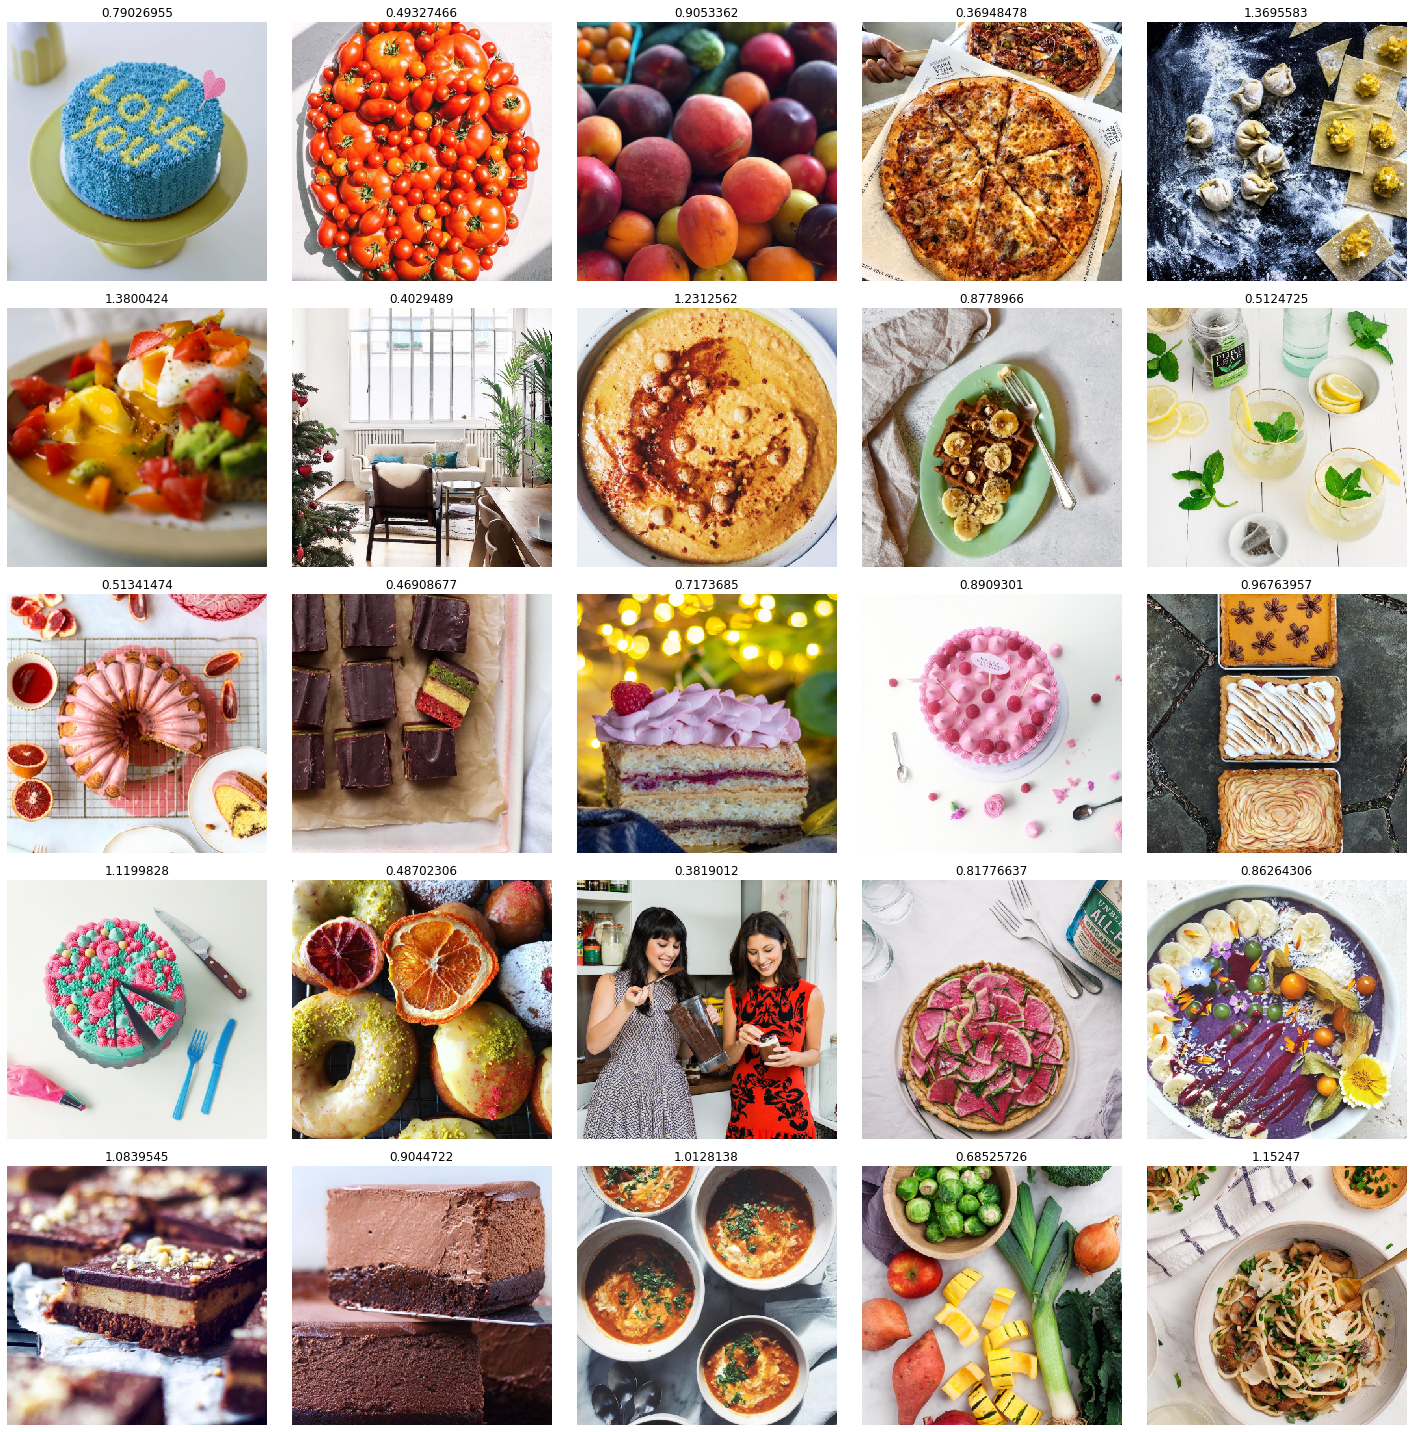

In [19]:
data.show_batch()

In [20]:
learn = cnn_learner(data, models.resnet34)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


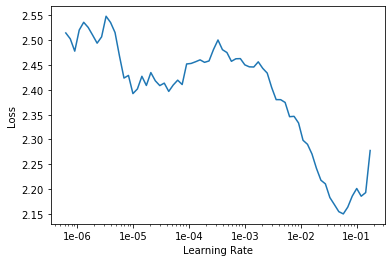

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(5, max_lr = 1e-2)

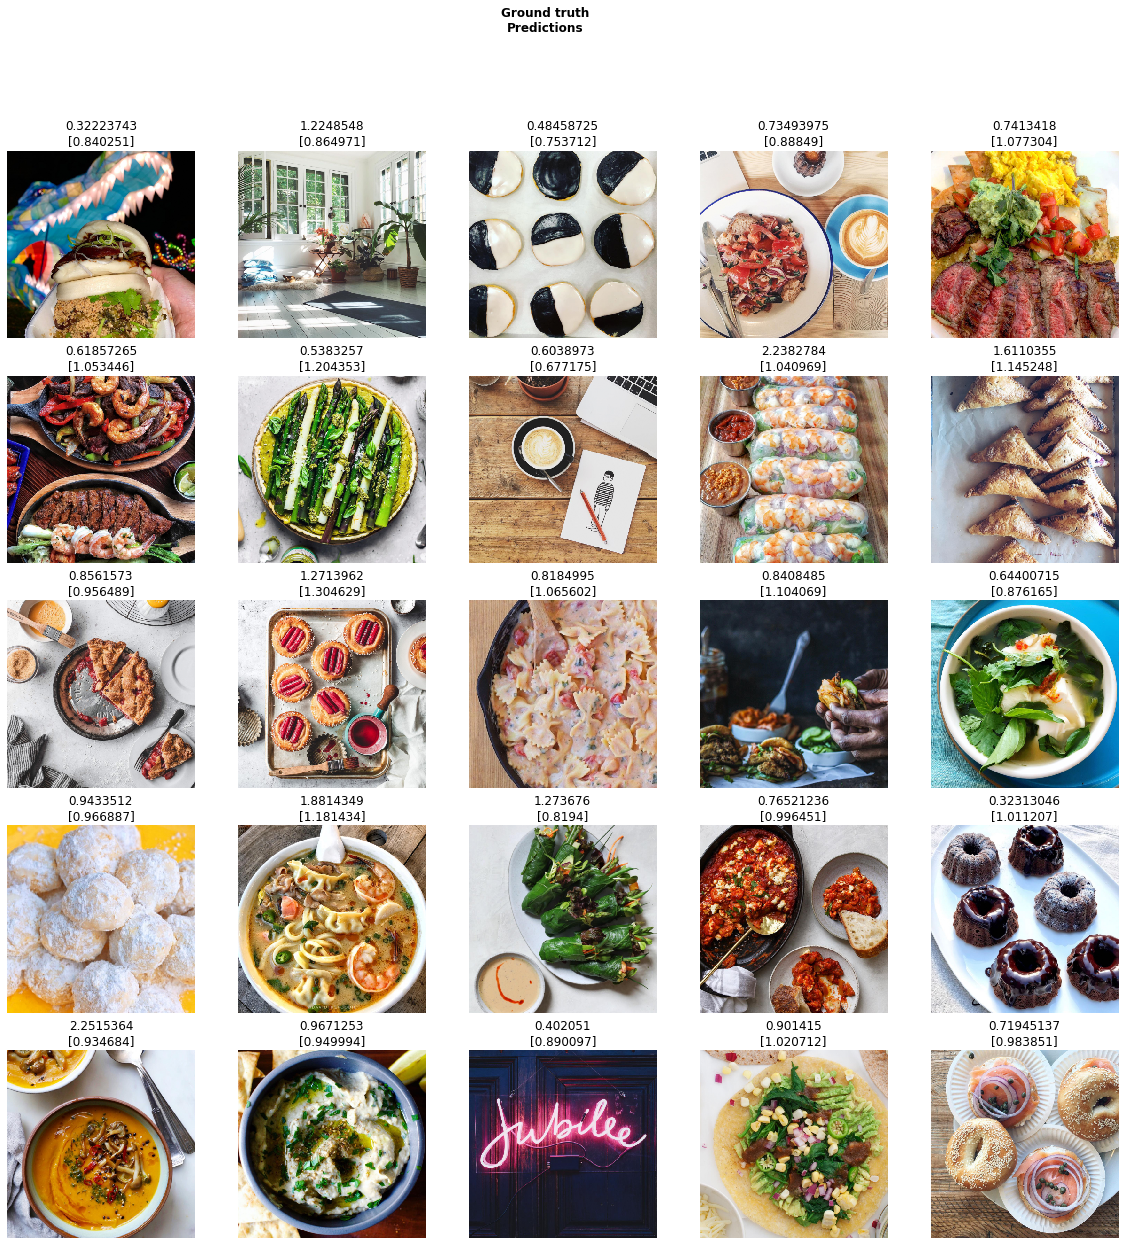

In [24]:
learn.show_results()

In [25]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


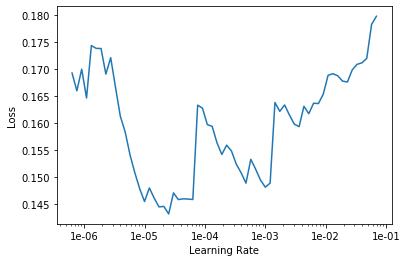

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(20, 1e-2/10)

In [29]:
learn.export('First Attempt.pkl')

In [30]:
interp = learn.interpret()

In [ ]:
learn = load_learner('First Attempt.pkl', num_workers = 0)

In [ ]:
imterp.